
# Decision Tree Regression

In [2]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from IPython.core.display_functions import display
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
df_air = pd.read_csv('../data/F1_4_clean_data.csv', on_bad_lines='skip', sep=',',  na_filter=True)

df_air = df_air[['EPRTRSectorCode', 'EPRTRAnnexIMainActivityCode', 'emissions', 'Longitude', 'Latitude', 'reportingYear']]

display(df_air.head())

,EPRTRSectorCode,EPRTRAnnexIMainActivityCode,emissions,Longitude,Latitude,reportingYear
0,4,4.0,3300.0,14.336056,48.290943,2007
1,9,2.0,170000.0,15.477778,47.019170,2007
2,6,3.0,228000000.0,15.691833,48.259556,2007
3,6,3.0,311000.0,15.691833,48.259556,2007
4,3,2.0,329000000.0,14.159778,47.807083,2007


In [4]:
X = df_air.drop('emissions', axis=1)
y = df_air['emissions'].values

scaler = StandardScaler()
X_standard = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

print('Training data size:', X_train.shape)
print('Test data size:', X_test.shape)

Training data size: (201996, 5)
Test data size: (86570, 5)


In [5]:
decision_model = DecisionTreeRegressor()
dt_model = decision_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

print('RMSE of Decision Tree Regression:', np.sqrt(mean_squared_error(y_pred,y_test)))

#accuracy = accuracy_score(y_test, y_pred)
#print(accuracy)

RMSE of Decision Tree Regression: 737257537.9447898


---
# Decision Tree Regression With Pivot Table


In [14]:
import numpy as np
import pandas as pd
from slugify import slugify

In [15]:
df = pd.read_csv('../data/F1_4_clean_data.csv', on_bad_lines='skip', sep=',',  na_filter=True)
df = df.rename(columns={'countryName': 'country', 'reportingYear':'year'}).drop(columns=['Unnamed: 0'], axis=1)

data_pivoted = df.pivot_table(index=['country', 'year'], columns=['pollutant'], values='emissions', aggfunc=np.sum, fill_value=0)
data_pivoted.head()

pollutant     2-ethyl hexyl  Aldrin  Anthracene   As  Asbestos  Benzene  \
country year                                                              
Austria 2007            0.0       0         0.0  0.0       0.0   6050.0   
        2008            0.0       0         0.0  0.0       0.0   7880.0   
        2009            0.0       0         0.0  0.0       0.0   9070.0   
        2010            0.0       0         0.0  0.0       0.0   3800.0   
        2011            0.0       0         0.0  0.0       0.0   4240.0   

pollutant     Benzo(g,h,i)perylene  CFCs         CH4           CO  ...  TRI  \
country year                                                       ...        
Austria 2007                   0.0   0.0  20953000.0  163261000.0  ...  0.0   
        2008                   0.0   0.0  18584000.0  144793000.0  ...  0.0   
        2009                   0.0   0.0  13526000.0  134999000.0  ...  0.0   
        2010                   0.0   0.0  13735000.0  124908000.0  ...  0.0   
        2011                   0.0   0.0  13277000.0  136169000.0  ...  0.0   

pollutant         Teq  Tetrachloroethylene  Toluene  Trichloromethane  \
country year                                                            
Austria 2007  0.00232                    0      0.0                 0   
        2008  0.00176                    0      0.0                 0   
        2009  0.00137                    0      0.0                 0   
        2010  0.00164                    0      0.0                 0   
        2011  0.00139                    0      0.0                 0   

pollutant     Vinyl chloride  Xylenes       Zn  total C  total F  
country year                                                      
Austria 2007               0        0  18820.0        0      0.0  
        2008               0        0  12140.0        0      0.0  
        2009               0        0   6664.0        0      0.0  
        2010               0        0   9934.0        0      0.0  
        2011               0        0   8490.0        0      0.0  

[5 rows x 62 columns]

In [16]:
data_pivoted.columns = [slugify(c, separator='_') for c in data_pivoted.columns]
data_pivoted.head()

2_ethyl_hexyl  aldrin  anthracene   as  asbestos  benzene  \
country year                                                              
Austria 2007            0.0       0         0.0  0.0       0.0   6050.0   
        2008            0.0       0         0.0  0.0       0.0   7880.0   
        2009            0.0       0         0.0  0.0       0.0   9070.0   
        2010            0.0       0         0.0  0.0       0.0   3800.0   
        2011            0.0       0         0.0  0.0       0.0   4240.0   

              benzo_g_h_i_perylene  cfcs         ch4           co  ...  tri  \
country year                                                       ...        
Austria 2007                   0.0   0.0  20953000.0  163261000.0  ...  0.0   
        2008                   0.0   0.0  18584000.0  144793000.0  ...  0.0   
        2009                   0.0   0.0  13526000.0  134999000.0  ...  0.0   
        2010                   0.0   0.0  13735000.0  124908000.0  ...  0.0   
        2011                   0.0   0.0  13277000.0  136169000.0  ...  0.0   

                  teq  tetrachloroethylene  toluene  trichloromethane  \
country year                                                            
Austria 2007  0.00232                    0      0.0                 0   
        2008  0.00176                    0      0.0                 0   
        2009  0.00137                    0      0.0                 0   
        2010  0.00164                    0      0.0                 0   
        2011  0.00139                    0      0.0                 0   

              vinyl_chloride  xylenes       zn  total_c  total_f  
country year                                                      
Austria 2007               0        0  18820.0        0      0.0  
        2008               0        0  12140.0        0      0.0  
        2009               0        0   6664.0        0      0.0  
        2010               0        0   9934.0        0      0.0  
        2011               0        0   8490.0        0      0.0  

[5 rows x 62 columns]

In [17]:
# remove the following comment to drop the multi-level index
data_pivoted.reset_index(inplace=True)

In [18]:
for element in list(data_pivoted.columns):
    if element not in ['country', 'year', '2_ethyl_hexyl', 'as']:
        rows = data_pivoted.query('{} > 0'.format(element)).shape[0]
        print(f'Rows for {element} : {rows}')
        if rows < 10: data_pivoted = data_pivoted.drop([element], axis=1)

data_pivoted.columns

Rows for aldrin : 1
Rows for anthracene : 60
Rows for asbestos : 7
Rows for benzene : 281
Rows for benzo_g_h_i_perylene : 14
Rows for cfcs : 163
Rows for ch4 : 387
Rows for co : 374
Rows for co2 : 392
Rows for cd : 300
Rows for chlordecone : 1
Rows for cr : 273
Rows for cu : 294
Rows for dce_12 : 143
Rows for dcm : 210
Rows for ethyl_benzene : 2
Rows for ethylene_oxide : 58
Rows for fine_particulate_matter_pm2_5 : 2
Rows for hcb : 29
Rows for hcfcs : 214
Rows for hch : 1
Rows for hcn : 179
Rows for hcl : 289
Rows for hf : 267
Rows for hfcs : 230
Rows for halons : 65
Rows for hg : 337
Rows for lindane : 3
Rows for n2o : 337
Rows for nh3 : 385
Rows for nmvoc : 353
Rows for nox : 394
Rows for naphthalene : 194
Rows for ni : 318
Rows for nonylphenol_and_nonylphenol_ethoxylates : 1
Rows for pahs : 225
Rows for pbde : 2
Rows for pcbs : 153
Rows for pcp : 10
Rows for pfcs : 172
Rows for pm10 : 376
Rows for pb : 281
Rows for pentachlorobenzene : 10
Rows for sf6 : 114
Rows for sox : 398
Rows fo

Index(['country', 'year', '2_ethyl_hexyl', 'anthracene', 'as', 'benzene',
       'benzo_g_h_i_perylene', 'cfcs', 'ch4', 'co', 'co2', 'cd', 'cr', 'cu',
       'dce_12', 'dcm', 'ethylene_oxide', 'hcb', 'hcfcs', 'hcn', 'hcl', 'hf',
       'hfcs', 'halons', 'hg', 'n2o', 'nh3', 'nmvoc', 'nox', 'naphthalene',
       'ni', 'pahs', 'pcbs', 'pcp', 'pfcs', 'pm10', 'pb', 'pentachlorobenzene',
       'sf6', 'sox', 'tcb', 'tce_111', 'tcm', 'tetrachloroethane_1122', 'toc',
       'tri', 'teq', 'tetrachloroethylene', 'trichloromethane',
       'vinyl_chloride', 'zn'],
      dtype='object')

In [19]:
data_pivoted.head()

,country,year,2_ethyl_hexyl,anthracene,as,benzene,benzo_g_h_i_perylene,cfcs,ch4,co,...,tce_111,tcm,tetrachloroethane_1122,toc,tri,teq,tetrachloroethylene,trichloromethane,vinyl_chloride,zn
0,Austria,2007,0.0,0.0,0.0,6050.0,0.0,0.0,20953000.0,163261000.0,...,0.0,0,0.0,0.0,0.0,0.00232,0,0,0,18820.0
1,Austria,2008,0.0,0.0,0.0,7880.0,0.0,0.0,18584000.0,144793000.0,...,0.0,0,0.0,0.0,0.0,0.00176,0,0,0,12140.0
2,Austria,2009,0.0,0.0,0.0,9070.0,0.0,0.0,13526000.0,134999000.0,...,0.0,0,0.0,0.0,0.0,0.00137,0,0,0,6664.0
3,Austria,2010,0.0,0.0,0.0,3800.0,0.0,0.0,13735000.0,124908000.0,...,0.0,0,0.0,0.0,0.0,0.00164,0,0,0,9934.0
4,Austria,2011,0.0,0.0,0.0,4240.0,0.0,0.0,13277000.0,136169000.0,...,0.0,0,0.0,0.0,0.0,0.00139,0,0,0,8490.0



## Labels Creation for each Country

In [20]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(data_pivoted['country'])

data_pivoted['country'] = label_encoder.transform(data_pivoted['country'])
print(label_encoder.classes_)

display(data_pivoted.head())

print(label_encoder.inverse_transform([9]))

['Austria' 'Belgium' 'Bulgaria' 'Croatia' 'Cyprus' 'Czechia' 'Denmark'
 'Estonia' 'Finland' 'France' 'Germany' 'Greece' 'Hungary' 'Iceland'
 'Ireland' 'Italy' 'Latvia' 'Lithuania' 'Luxembourg' 'Malta' 'Netherlands'
 'Norway' 'Poland' 'Portugal' 'Romania' 'Serbia' 'Slovakia' 'Slovenia'
 'Spain' 'Sweden' 'Switzerland' 'United Kingdom']


,country,year,2_ethyl_hexyl,anthracene,as,benzene,benzo_g_h_i_perylene,cfcs,ch4,co,...,tce_111,tcm,tetrachloroethane_1122,toc,tri,teq,tetrachloroethylene,trichloromethane,vinyl_chloride,zn
0,0,2007,0.0,0.0,0.0,6050.0,0.0,0.0,20953000.0,163261000.0,...,0.0,0,0.0,0.0,0.0,0.00232,0,0,0,18820.0
1,0,2008,0.0,0.0,0.0,7880.0,0.0,0.0,18584000.0,144793000.0,...,0.0,0,0.0,0.0,0.0,0.00176,0,0,0,12140.0
2,0,2009,0.0,0.0,0.0,9070.0,0.0,0.0,13526000.0,134999000.0,...,0.0,0,0.0,0.0,0.0,0.00137,0,0,0,6664.0
3,0,2010,0.0,0.0,0.0,3800.0,0.0,0.0,13735000.0,124908000.0,...,0.0,0,0.0,0.0,0.0,0.00164,0,0,0,9934.0
4,0,2011,0.0,0.0,0.0,4240.0,0.0,0.0,13277000.0,136169000.0,...,0.0,0,0.0,0.0,0.0,0.00139,0,0,0,8490.0


['France']



## Moving Window Functions


In [21]:
year_list = data_pivoted['year'].unique().tolist()

for i, y in enumerate(year_list[:-1]):
    train_yr = year_list[:i+1]
    test_yr = [year_list[i+1]]
    print('train: ', train_yr, 'test: ',test_yr)

train:  [2007] test:  [2008]
train:  [2007, 2008] test:  [2009]
train:  [2007, 2008, 2009] test:  [2010]
train:  [2007, 2008, 2009, 2010] test:  [2011]
train:  [2007, 2008, 2009, 2010, 2011] test:  [2012]
train:  [2007, 2008, 2009, 2010, 2011, 2012] test:  [2013]
train:  [2007, 2008, 2009, 2010, 2011, 2012, 2013] test:  [2014]
train:  [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014] test:  [2015]
train:  [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015] test:  [2016]
train:  [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016] test:  [2017]
train:  [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017] test:  [2018]
train:  [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018] test:  [2019]
train:  [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019] test:  [2020]



## Let's concentrate now on one specific pollutant, for example CO2

In [23]:
def get_test_train(pollutant):
    years = data_pivoted['year'].unique().tolist()
    splits = {'train': [], 'test': []}

    for index, yr in enumerate(years[:-1]):
        train_year = years[:index+1]
        test_year = [years[index+1]]

        df_test = data_pivoted.loc[data_pivoted.year.isin(test_year), :]
        df_train = data_pivoted.loc[data_pivoted.year.isin(train_year), :]

        splits['test'].append(df_test[[pollutant, 'country', 'year']])
        splits['train'].append(df_train[[pollutant, 'country', 'year']])
    return splits

selected_pollutant = 'co2'
splits_pollutant = get_test_train(selected_pollutant)

In [24]:
 # train:  [2007, 2008] test:  [2009]
X_train = splits_pollutant['train'][2][['year', 'country']]
y_train = splits_pollutant['train'][2][[selected_pollutant]]
X_test = splits_pollutant['test'][2][['year', 'country']]
y_test = splits_pollutant['test'][2][[selected_pollutant]]

X_standard = StandardScaler().fit_transform(X_train, X_test)

decision_model = DecisionTreeRegressor()
dt_model = decision_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

In [29]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_log_error as rmsle

print('RMSE of Decision Tree Regression:', np.sqrt(mean_squared_error(y_pred, y_test)))
print(f'Precision: {(rmsle(y_test, y_pred))*100:0.2f}%')
print('R² score on test set using Decision Tree Regression : {:.4f}'.format(r2_score(y_test, y_pred)))

RMSE of Decision Tree Regression: 14735007951.82701
Precision: 1138.57%
R² score on test set using Decision Tree Regression : 0.9825


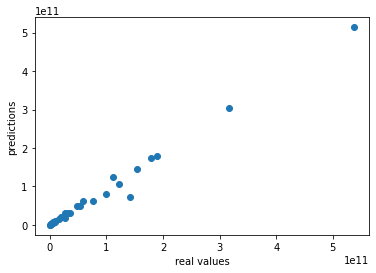

In [27]:
plt.scatter(y_test, y_pred)
plt.xlabel('real values')
plt.ylabel('predictions')
plt.show()

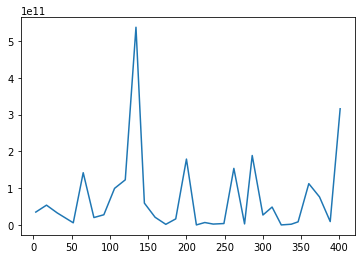

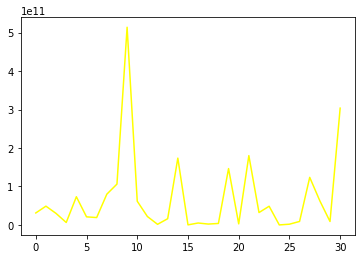

In [28]:
plt.plot(y_test)
plt.show()
plt.plot(y_pred, color='yellow')
plt.show()